# **Kmeans Tutorial**

Ricardo Ernesto Hernández Orozco


**Objetivo:** Este notebook explica los fundamentos de la técnica K-Means, su formulación matemática y muestra una implementación práctica en Python usando `scikit-learn`. Está diseñado para ejecutarse correctamente en Jupyter o Google Colab.

1.1. Fundamentos de la técnica (breve resumen)


K-Means es una técnica de *aprendizaje no supervisado* utilizada para agrupar (clasificar sin etiquetas) observaciones similares en **k grupos (clusters)** según su proximidad en el espacio de características.


El algoritmo intenta minimizar la suma de las distancias cuadradas entre los puntos y el centro del clúster al que pertenecen. Es ampliamente usado en minería de datos, segmentación de clientes y reducción de dimensionalidad.


**Etapas básicas del algoritmo:**
1. Seleccionar k centroides iniciales (aleatorios o por heurística).
2. Asignar cada punto al clúster con el centro más cercano.
3. Recalcular los centroides como el promedio de los puntos asignados a cada clúster.
4. Repetir pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.


Ventajas: sencillo, eficiente, interpretativo.
Limitaciones: requiere definir k, sensible a outliers y a la inicialización.

1.2. Modelo matemático


Dado un conjunto de datos $X = \{x_1, x_2, ..., x_N\}$ con $x_i \in \mathbb{R}^d$, K-Means busca particionar los datos en k grupos $C_1, C_2, ..., C_k$ minimizando la función objetivo:


$$J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$$


Donde $\mu_i$ es el **centroide** del clúster $C_i$, calculado como:


$$\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$$


La asignación de cada punto se hace según la distancia mínima al centroide:


$$c(x) = \arg\min_i \|x - \mu_i\|^2$$


El algoritmo itera hasta la convergencia o hasta un máximo número de iteraciones.

## 1.3. Librerías, clases y funciones (breve descripción)


- `numpy`: operaciones numéricas.
- `pandas`: manipulación de datos tabulares.
- `matplotlib.pyplot`, `seaborn`: visualización de datos (gráficos de dispersión).
- `sklearn.datasets`: datasets de ejemplo (Iris, blobs, etc.).
- `sklearn.preprocessing.StandardScaler`: estandarización de datos.
- `sklearn.cluster.KMeans`: implementación del algoritmo K-Means.
- `sklearn.metrics`: funciones para evaluar agrupamientos (`confusion_matrix`, `accuracy_score`, `adjusted_rand_score`).

1.4. Pipeline


Subsecciones: Preprocesamiento, Prediction, Model Evaluation.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score


# Cargar dataset Iris (para comparación con etiquetas verdaderas)
iris = datasets.load_iris()
X = iris.data
y_true = iris.target
columns = iris.feature_names


df = pd.DataFrame(X, columns=columns)
df['true_label'] = y_true


print('Dataset Iris cargado con', df.shape[0], 'instancias y', len(columns), 'features.')

Dataset Iris cargado con 150 instancias y 4 features.


Preprocesamiento


Mostramos estadísticas básicas (media, desviación estándar, mínimos y máximos) y un gráfico de dispersión para observar la distribución de los datos.

Estadísticas descriptivas:
                        mean       std  min  max
sepal length (cm)  5.843333  0.828066  4.3  7.9
sepal width (cm)   3.057333  0.435866  2.0  4.4
petal length (cm)  3.758000  1.765298  1.0  6.9
petal width (cm)   1.199333  0.762238  0.1  2.5
true_label         1.000000  0.819232  0.0  2.0


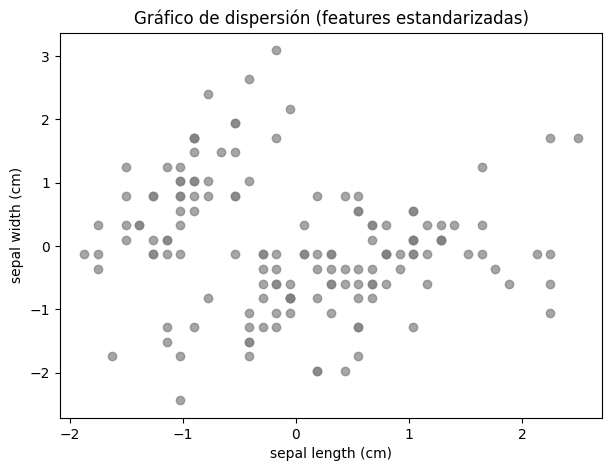

In [8]:
# Estadísticas descriptivas
stats = df.describe().T[['mean', 'std', 'min', 'max']]
print('Estadísticas descriptivas:\n', stats)


# Estandarizar características (importante para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Visualización: gráfico de dispersión entre las dos primeras características
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', alpha=0.7)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title('Gráfico de dispersión (features estandarizadas)')
plt.show()

Entrenamiento del modelo K-Means


Entrenamos el modelo con k = 3 (ya que el conjunto de datos Iris tiene 3 clases). Luego mostramos los centroides y las etiquetas asignadas.

Centroides:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Iteraciones hasta convergencia: 4


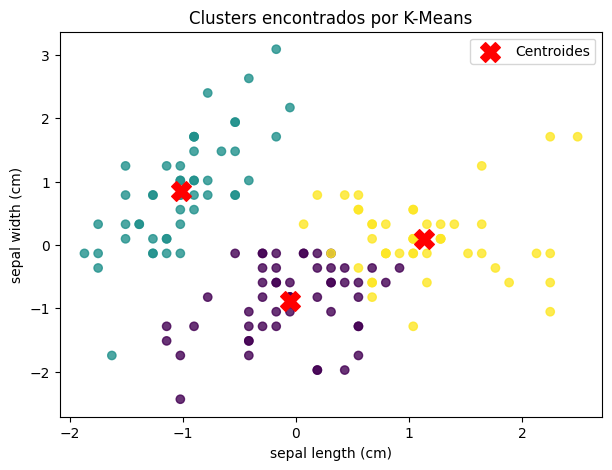

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)


print('Centroides:\n', kmeans.cluster_centers_)
print('\nIteraciones hasta convergencia:', kmeans.n_iter_)


# Añadir etiquetas predichas al DataFrame
df['cluster'] = kmeans.labels_


# Visualización de clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title('Clusters encontrados por K-Means')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.show()

Prediction


Definimos una función para predecir el clúster de un nuevo patrón.

In [10]:
def predict_pattern_kmeans(model, pattern):
  """Recibe un modelo KMeans y un patrón de entrada, devuelve el número de clúster asignado."""
  x = np.array(pattern).reshape(1, -1)
  x_scaled = scaler.transform(x)
  cluster_id = model.predict(x_scaled)[0]
  return {'pattern': pattern, 'predicted_cluster': int(cluster_id)}


# Ejemplo de uso
print(predict_pattern_kmeans(kmeans, X[0]))

{'pattern': array([5.1, 3.5, 1.4, 0.2]), 'predicted_cluster': 1}


Model Evaluation


Aunque K-Means es no supervisado, podemos evaluar su desempeño comparándolo con las etiquetas verdaderas (si las tenemos), usando métricas como la matriz de confusión, *accuracy* y *Adjusted Rand Index (ARI)*.

Matriz de confusión:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]

Accuracy (solo para referencia, requiere etiquetas reales): 0.24
Adjusted Rand Index (ARI): 0.6201351808870379


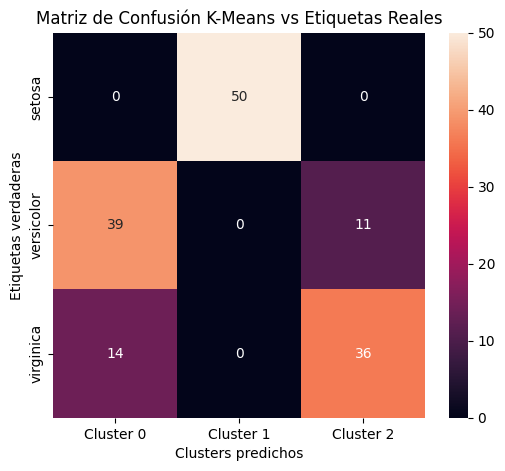

In [11]:
# Crear matriz de confusión entre etiquetas verdaderas y clusters encontrados
cm = confusion_matrix(y_true, kmeans.labels_)
acc = accuracy_score(y_true, kmeans.labels_)
ari = adjusted_rand_score(y_true, kmeans.labels_)


print('Matriz de confusión:\n', cm)
print('\nAccuracy (solo para referencia, requiere etiquetas reales):', acc)
print('Adjusted Rand Index (ARI):', ari)


# Visualizar matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Cluster 0','Cluster 1','Cluster 2'], yticklabels=iris.target_names)
plt.xlabel('Clusters predichos')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión K-Means vs Etiquetas Reales')
plt.show()

## Referencias bibliográficas

MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. *Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability*, 1(14), 281–297.


Lloyd, S. (1982). Least squares quantization in PCM. *IEEE Transactions on Information Theory, 28*(2), 129–137.


Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830.